# LSTM预测

## 导入需要的模块

- 基于keras api tensorflow为backend

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 
import math
import os

# LSTM based on keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

# use cuda 
os.environ["CUDA_VISIBLE_DEVICES"]="1"
plt.style.use('ggplot')

Using TensorFlow backend.


## 加载数据集及数据预处理

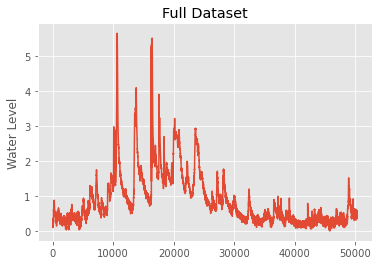

In [2]:
# load train dataset
df = pd.read_csv('./dataset/flood_data.csv',usecols=[1],engine='python',skipfooter=3)
water_arr = df.values.astype('float32')
plt.figure()
plt.title('Full Dataset')
plt.ylabel('Water Level')
plt.plot(water_arr)

In [3]:
# normalize 归一化处理
scaler = MinMaxScaler(feature_range=(0,1))
water_arr = scaler.fit_transform(water_arr)
print('数据集总长：{}'.format(water_arr.shape[0]))

数据集总长：50314


In [4]:
# 将数据集分割为 训练集和测试集
train_size = int(water_arr.shape[0] * 0.67) # 前2/3作为训练集
train_data = water_arr[0:train_size]
test_data = water_arr[train_size:water_arr.shape[0]]
print('训练集长度：{} 测试集长度：{}'.format(train_data.shape[0],test_data.shape[0]))

训练集长度：33710 测试集长度：16604


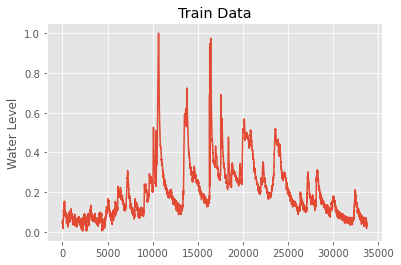

In [5]:
plt.figure()
plt.title('Train Data')
plt.ylabel('Water Level')
plt.plot(train_data)

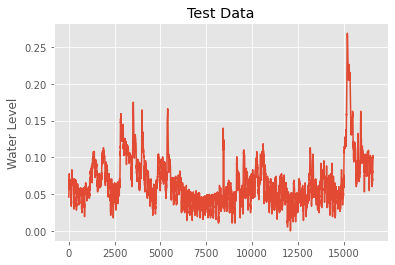

In [6]:
plt.figure()
plt.title('Test Data')
plt.ylabel('Water Level')
plt.plot(test_data)

In [7]:
# 滚动预测
def create_net_data(data,slide_win = 10):
    data_X , data_Y = [], []
    for i in range(data.shape[0]-slide_win-1):
        # 用i-i+silde_win-1部分的数据 预测i+slide_win处的数据
        data_X.append(data[i:i+slide_win])
        data_Y.append(data[i+slide_win])
    return np.array(data_X),np.array(data_Y)

In [8]:
train_X,train_Y = create_net_data(train_data)
train_X.reshape(train_X.shape[0],1,train_X.shape[1])
test_X,test_Y = create_net_data(test_data)
test_X.reshape(test_X.shape[0],1,test_X.shape[1])
print(train_X.shape,test_X.shape)

(33699, 10, 1) (16593, 10, 1)


## 搭建神经网络

- 2 hidden layers 128、96 units respectively
- 2 fc layers

In [9]:
# create lstm model
# 2 hidden layers 128 96 respectively
# 2 fc layers
model = Sequential()
model.add(LSTM(128,input_shape=(10,1),return_sequences=True))
model.add(LSTM(96,return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(train_X,train_Y,epochs=500,batch_size = 256,verbose=1)

Epoch 1/500
33699/33699 [==============================] - 17s 496us/step - loss: 0.0018
Epoch 2/500
33699/33699 [==============================] - 16s 465us/step - loss: 1.4163e-04
Epoch 3/500
33699/33699 [==============================] - 16s 474us/step - loss: 1.4093e-04
Epoch 4/500
33699/33699 [==============================] - 16s 485us/step - loss: 1.3989e-04
Epoch 5/500
33699/33699 [==============================] - 16s 477us/step - loss: 1.3923e-04
Epoch 6/500
33699/33699 [==============================] - 16s 476us/step - loss: 1.3596e-04
Epoch 7/500
33699/33699 [==============================] - 16s 474us/step - loss: 1.3831e-04
Epoch 8/500
33699/33699 [==============================] - 16s 473us/step - loss: 1.3381e-04
Epoch 9/500
33699/33699 [==============================] - 15s 454us/step - loss: 1.3287e-04
Epoch 10/500
33699/33699 [==============================] - 16s 476us/step - loss: 1.3927e-04
Epoch 11/500
33699/33699 [==============================] - 16s 470us/ste

33699/33699 [==============================] - 17s 499us/step - loss: 8.5955e-05
Epoch 175/500
33699/33699 [==============================] - 17s 496us/step - loss: 8.3135e-05
Epoch 176/500
33699/33699 [==============================] - 17s 500us/step - loss: 8.3325e-05
Epoch 177/500
33699/33699 [==============================] - 17s 497us/step - loss: 8.2846e-05
Epoch 178/500
33699/33699 [==============================] - 17s 499us/step - loss: 8.1468e-05
Epoch 179/500
33699/33699 [==============================] - 18s 533us/step - loss: 8.2068e-05
Epoch 180/500
33699/33699 [==============================] - 17s 498us/step - loss: 8.5109e-05
Epoch 181/500
33699/33699 [==============================] - 17s 499us/step - loss: 8.2645e-05
Epoch 182/500
33699/33699 [==============================] - 17s 499us/step - loss: 8.3720e-05
Epoch 183/500
33699/33699 [==============================] - 17s 497us/step - loss: 8.2450e-05
Epoch 184/500
33699/33699 [==============================] - 17s

33699/33699 [==============================] - 14s 424us/step - loss: 3.2240e-05
Epoch 347/500
33699/33699 [==============================] - 14s 428us/step - loss: 3.1907e-05
Epoch 348/500
33699/33699 [==============================] - 14s 422us/step - loss: 3.1838e-05
Epoch 349/500
33699/33699 [==============================] - 14s 427us/step - loss: 3.0826e-05
Epoch 350/500
33699/33699 [==============================] - 14s 423us/step - loss: 3.1539e-05
Epoch 351/500
33699/33699 [==============================] - 14s 430us/step - loss: 3.0754e-05
Epoch 352/500
33699/33699 [==============================] - 14s 426us/step - loss: 3.0468e-05
Epoch 353/500
33699/33699 [==============================] - 14s 424us/step - loss: 3.1073e-05
Epoch 354/500
33699/33699 [==============================] - 14s 428us/step - loss: 3.1746e-05
Epoch 355/500
33699/33699 [==============================] - 14s 419us/step - loss: 3.1403e-05
Epoch 356/500
33699/33699 [==============================] - 14s

## 训练结果

In [12]:
# 评价模型 使用RMSE 均方根误差
train_score = model.evaluate(train_X,train_Y)
train_score = math.sqrt(train_score)
# 因为经过了归一化处理 要再进行反归一化
train_score = scaler.inverse_transform(np.array([[train_score]]))
print('Train Score: %.2f RMSE' % (train_score))

test_score = model.evaluate(test_X,test_Y)
test_score = math.sqrt(test_score)
test_score = scaler.inverse_transform(np.array([[test_score]]))
print('Test Score: %.2f RMSE' % (test_score))

33699/33699 [==============================] - 7s 202us/step
Train Score: 0.03 RMSE
16593/16593 [==============================] - 3s 200us/step
Test Score: 0.02 RMSE


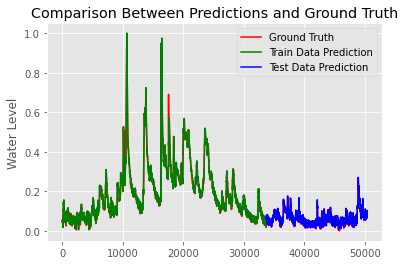

In [16]:
# 可视化训练结果 并将其用于测试集测试
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

train_pred_plot = np.empty_like(water_arr)
train_pred_plot[:,:] = np.nan
train_pred_plot[10:len(train_pred)+10,:] = train_pred

test_pred_plot = np.empty_like(water_arr)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_pred)+1+(10*2):len(water_arr)-1,:] = test_pred

# 可视化
plt.figure()
plt.title('Comparison Between Predictions and Ground Truth')
plt.ylabel('Water Level')
plt.plot(water_arr,label='Ground Truth',color='r')
plt.plot(train_pred_plot,label='Train Data Prediction',color='g')
plt.plot(test_pred_plot,label='Test Data Prediction',color='b')
plt.legend()
plt.show()